### Data Exploration and Analysis

In [10]:
import os
from pathlib import Path

# Define dataset paths
notebook_path: Path = Path().resolve()
root_dir: Path = notebook_path.parent
print(f"{root_dir = }")

# can be change to use "our_own_dataset"
fer_processed_dir = root_dir/"data"/"fer_dataset"/"processed_data"

print("\n=== EXPLORING SOURCE DATASET ===")
# Explore dataset structure
emotions_map: dict[str, list[str]] = {}
total_images: int = 0
min_imgs_count: int = -1

# List all emotion classes
emotions: list[str] = sorted([p.name for p in fer_processed_dir.iterdir()])
print(f"Emotion classes found: {emotions}\n")

for emotion in emotions:  # here we can limit the emotions count
    emotion_path: Path = fer_processed_dir/emotion
    if emotion_path.is_dir():
        emotion_images_paths = [p for p in Path(emotion_path).rglob("*")
                                if p.suffix.lower() in {".jpg", ".jpeg", ".png"}]
        num_images = len(emotion_images_paths)
        emotions_map[emotion] = emotion_images_paths
        total_images += num_images
        print(f"{emotion.title()}: {num_images} images")

# Add minimum count to the dictionary
min_imgs_count = min([len(val) for val in emotions_map.values()])
print(f"\nMinimum images per class: {min_imgs_count}")

# Display total dataset size
print(f"\nTotal images in dataset: {total_images}")
print(f"Number of emotion classes: {len(emotions)}")


root_dir = PosixPath('/home/natishch/repos/facial-emotion-recognition')

=== EXPLORING SOURCE DATASET ===
Emotion classes found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Angry: 5920 images
Disgust: 5920 images
Fear: 5920 images
Happy: 11398 images
Neutral: 8166 images
Sad: 6535 images
Surprise: 5920 images

Minimum images per class: 5920

Total images in dataset: 49779
Number of emotion classes: 7


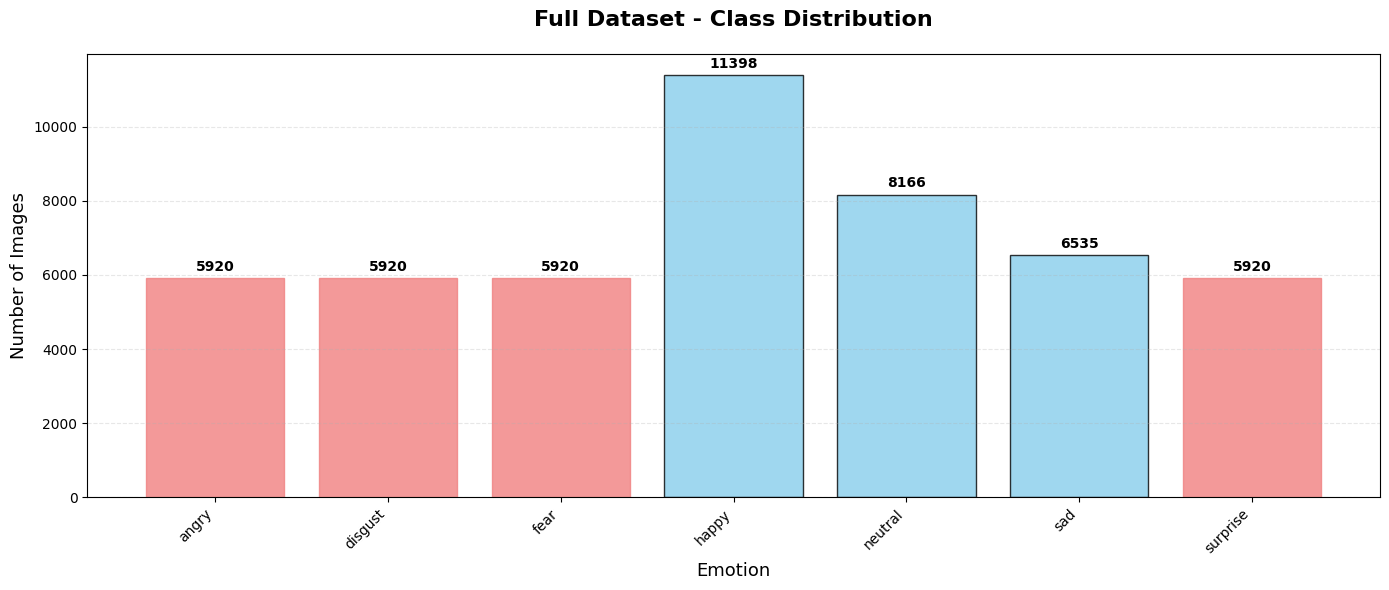


Class Imbalance Analysis:
Maximum images per class: 11398
Minimum images per class: 5920
Imbalance ratio (max/min): 1.93x


In [20]:
import matplotlib.pyplot as plt


# Visualize class distribution
emotion_names = emotions_map.keys()
emotion_values = [len(val) for val in emotions_map.values()]

plt.figure(figsize=(14, 6))
bars = plt.bar(emotion_names, emotion_values, color='skyblue', edgecolor='black', alpha=0.8)

# Highlight the class with minimum count
for i, (name, value) in enumerate(zip(emotion_names, emotion_values)):
    if value == min_imgs_count:
        bars[i].set_color('lightcoral')

plt.title('Full Dataset - Class Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Emotion', fontsize=13)
plt.ylabel('Number of Images', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (name, value) in enumerate(zip(emotion_names, emotion_values)):
    plt.text(i, value + max(emotion_values)*0.01, str(value),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('full_dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate class imbalance ratio
max_count = max(emotion_values)
imbalance_ratio = max_count / min_imgs_count
print(f"\nClass Imbalance Analysis:")
print(f"Maximum images per class: {max_count}")
print(f"Minimum images per class: {min_imgs_count}")
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}x")

### Interpretation of class distribution

From the bar chart above we can see that the dataset is **not perfectly balanced**:

- Some emotions have **many more images** than others.
- In particular, the smallest class has significantly fewer samples than the largest one.
- This imbalance can cause the model to:
  - bias toward the frequent classes,
  - and perform poorly on the rare emotions.

To reduce this effect, in the next steps we **balance the dataset** so that each emotion has the same number of images (equal to the size of the smallest class).


2025-11-26 16:25:21.407261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-26 16:25:21.407534: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-26 16:25:21.435131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-26 16:25:22.286146: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different compu

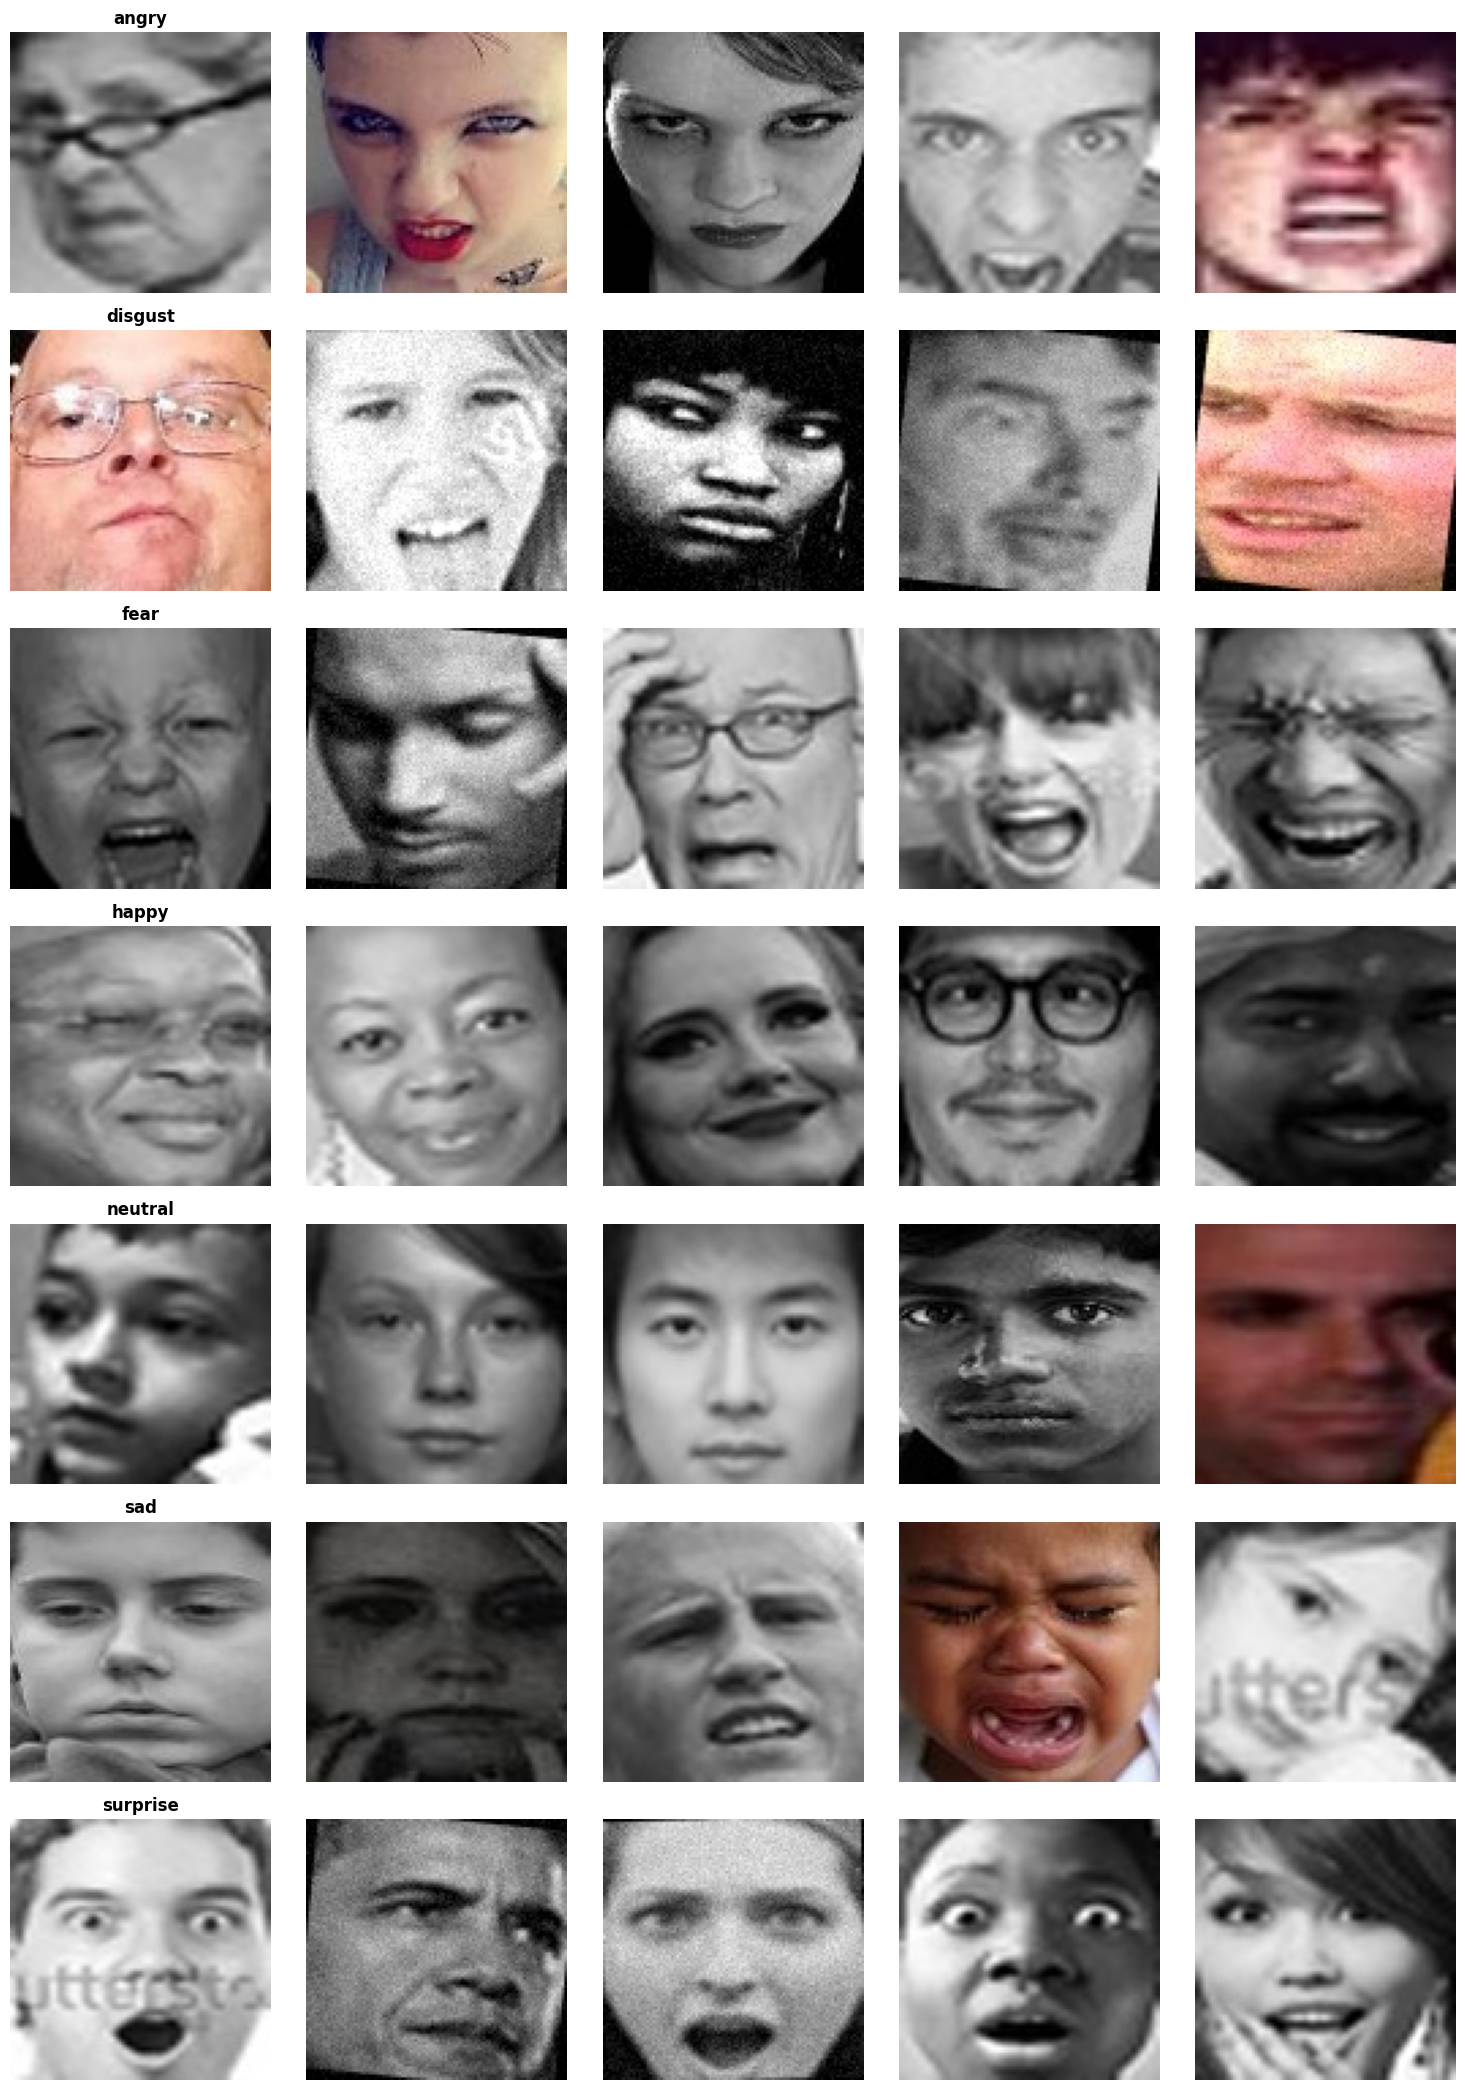

In [15]:
import random
from tensorflow.keras.preprocessing.image import load_img


RANDOM_SEED:int = 42
random.seed(RANDOM_SEED)

# Display sample images from each emotion class
num_samples=5
emotions = len(emotions_map.keys())

fig, axes = plt.subplots(emotions, num_samples,
                          figsize=(num_samples*3, emotions*3))

for i, emotion in enumerate(emotions_map):
    image_files_paths = random.sample(emotions_map[emotion], num_samples)

    for j, img_fil_path in enumerate(image_files_paths):
        img = load_img(img_fil_path)
        ax = axes[i, j]

        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(emotion, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')
plt.show()

### Step 4. Preprocesses RGB convertion

In [ ]:
# ==============================================================================
# Creates emotion folders inside proccessed data directory
# ==============================================================================

print("\n\nCreating emotion subdirectories...\n")

created_dirs = []

for emotion in EMOTIONS_MAP.keys():
    emotion_dir = os.path.join(PROCCESS_DATA_DIR, emotion)

    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir, exist_ok=True)
        created_dirs.append(emotion_dir)

print(f"✓ Created {len(created_dirs)} emotion subdirectories")

# Display directory tree structure
print(f"\nDirectory tree:")
print(f"{PROCCESS_DATA_DIR}/")
for i, emotion in enumerate(emotions):
    prefix = "└──" if i == len(emotions) - 1 else "├──"
    print(f"│   {prefix} {emotion}/")



Creating emotion subdirectories...

✓ Created 7 emotion subdirectories
  Structure: /content/drive/MyDrive/Project_2/data/proccessed_data/fer_dataset//{emotion}/

Directory tree:
/content/drive/MyDrive/Project_2/data/proccessed_data/fer_dataset/


In [ ]:
# ==============================================================================
# Reads each image, preprocesses it (RGB convert), and saves to destination
# This is the most time-consuming step - processes all images
# ==============================================================================

from PIL import Image
from tqdm import tqdm


# Preprocessing settings
RANDOM_SEED = 42          # For reproducibility
JPEG_QUALITY = 95         # Quality for saving images (1-100)

def preprocess_convert_to_rgb_and_save_image(src_path, dest_path, quality):
    """
    Preprocess a single image and save it

    Args:
        src_path: Source image path
        dest_path: Destination image path
        quality: JPEG quality (1-100)

    Returns:
        bool: True if successful, False otherwise
    """
    try:
        # Read image
        img = Image.open(src_path)

        # Convert to RGB if needed (handles grayscale images)
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Save preprocessed image
        img.save(dest_path, 'JPEG', quality=quality)

        return True
    except Exception as e:
        print(f"    ✗ Error processing {os.path.basename(src_path)}: {e}")
        return False


# Process all splits
print("Preprocessing and copying images...")
print("This may take several minutes depending on dataset size.\n")
print("="*70)

# running first pre-proccess (RGB convertion)
for emotion in EMOTIONS_MAP.keys():
    imgs_paths = EMOTIONS_MAP[emotion]

    if len(imgs_paths) == 0:
        continue

    print(f"  {emotion}: Processing {len(imgs_paths)} images...", end=" ")

    success_count = 0
    failed_count = 0

    for imgs_path in tqdm(imgs_paths, desc=f"    {emotion}", leave=False):
        filename = os.path.basename(imgs_path)
        dest_path = os.path.join(PROCCESS_DATA_DIR, emotion, filename)

        if preprocess_convert_to_rgb_and_save_image(imgs_path, dest_path, JPEG_QUALITY):
            success_count += 1
        else:
            failed_count += 1

    print(f"\n✓ {success_count} successful, {failed_count} failed")

print("\n" + "="*70)
print("PREPROCESSING COMPLETE")
print("="*70)

Preprocessing and copying images...
This may take several minutes depending on dataset size.

  angry: Processing 5920 images... 


✓ 5920 successful, 0 failed
  disgust: Processing 5920 images... 


✓ 5920 successful, 0 failed
  fear: Processing 5920 images... 


✓ 5920 successful, 0 failed
  happy: Processing 11398 images... 


✓ 11398 successful, 0 failed

PREPROCESSING COMPLETE


In [17]:
import random

# ==============================================================================
# Limits each emotion to MIN_COUNT_IMGS to create a balanced dataset
# This solves class imbalance but reduces total dataset size
#
# PROS: Perfect balance, prevents model bias toward majority classes
# CONS: Loses data from emotions with more images
#
# Set BALANCE_DATASET = True to enable, False to skip
# ==============================================================================

RANDOM_SEED:int = 42
random.seed(RANDOM_SEED)

# Dataset Balancing
BALANCE_DATASET = True
balance_image_count: int = min_imgs_count  # can be change manually to lower number then 5920

if BALANCE_DATASET:
    print(f"\n\nBalancing dataset by limiting each emotion to {balance_image_count} images\n")
    print("="*70)

    balanced_emotions_map: dict[str, list[str]] = {}
    total_before = sum(len(images) for images in emotions_map.values())

    for emotion, img_paths in emotions_map.items():
        original_count = len(img_paths)

        # Shuffle images randomly before selecting the subset
        random.shuffle(img_paths)

        # Keep only min_images number of files
        balanced_emotions_map[emotion] = img_paths[:balance_image_count]

        removed_count = original_count - balance_image_count

        suffix = f"(removed {removed_count:4d})" if removed_count > 0 else '(no change)'
        print(f"{emotion:12s}: {original_count:5d} → {balance_image_count:5d} {suffix}")


    print("="*70)

    # Calculate totals
    total_after = sum(len(files) for files in balanced_emotions_map.values())

    print(f"\nDataset balanced successfully!")
    print(f"  Total images: {total_before} → {total_after}")
    print(f"  Images per emotion: {balance_image_count}")
else:
    print("Dataset balancing skipped.")



Balancing dataset by limiting each emotion to 5920 images

angry       :  5920 →  5920 (no change)
disgust     :  5920 →  5920 (no change)
fear        :  5920 →  5920 (no change)
happy       : 11398 →  5920 (removed 5478)
neutral     :  8166 →  5920 (removed 2246)
sad         :  6535 →  5920 (removed  615)
surprise    :  5920 →  5920 (no change)

Dataset balanced successfully!
  Total images: 49779 → 41440
  Images per emotion: 5920


### Why we balance to the size of the smallest class

We chose to set the target number of images per emotion to:

> **`balance_image_count = min(class_counts.values())`**

This means:

- We **downsample** all classes to match the smallest one.
- As a result, every emotion has **exactly the same number of samples**.
- This removes class imbalance and makes the classification problem more fair.

Trade-offs:

- ✅ The model cannot “cheat” by always predicting the majority classes.
- ✅ Evaluation metrics (accuracy, F1, etc.) become more meaningful across emotions.
- ❌ We discard some images from the larger classes.
- If needed in the future, we could use **data augmentation** or **class weights** instead of (or in addition to) strict downsampling.


In [18]:
# ==============================================================================
# Randomly shuffles images and splits them into train/val/test sets
# ==============================================================================

# Split ratios (must sum to 1.0)
TRAIN_RATIO = 0.7   # 70% for training
VAL_RATIO = 0.15    # 15% for validation
TEST_RATIO = 0.15   # 15% for testing

# Dictionary to store split file lists
split_files = {
    'train': {},
    'val': {},
    'test': {}
}

print("Shuffling and splitting files...\n")
print("="*70)

emotion_map = balanced_emotions_map if BALANCE_DATASET else emotions_map

for emotion, img_paths in emotion_map.items():
    if len(img_paths) == 0:
        print(f"⚠ {emotion}: No files to split, skipping...")
        continue

    # Shuffle files randomly
    random.shuffle(img_paths)

    # Calculate split indices
    total = len(img_paths)
    train_end = int(total * TRAIN_RATIO)
    val_end = train_end + int(total * VAL_RATIO)

    # Split files into three sets
    train_files = img_paths[:train_end]
    val_files = img_paths[train_end:val_end]
    test_files = img_paths[val_end:]

    # Store in coresponse folder
    split_files['train'][emotion] = train_files
    split_files['val'][emotion] = val_files
    split_files['test'][emotion] = test_files

    print(f"{emotion:12s}: Train={len(train_files):4d}, Val={len(val_files):4d}, Test={len(test_files):4d}, Total={total:4d}")

print("="*70)

# Display split summary
total_train = sum(len(files) for files in split_files['train'].values())
total_val = sum(len(files) for files in split_files['val'].values())
total_test = sum(len(files) for files in split_files['test'].values())
total_all = total_train + total_val + total_test

print(f"\nSplit Summary:")
print(f"  Training: {total_train} images ({total_train/total_all*100:.1f}%)")
print(f"  Validation: {total_val} images ({total_val/total_all*100:.1f}%)")
print(f"  Test: {total_test} images ({total_test/total_all*100:.1f}%)")
print(f"  Total: {total_all} images")

Shuffling and splitting files...

angry       : Train=4144, Val= 888, Test= 888, Total=5920
disgust     : Train=4144, Val= 888, Test= 888, Total=5920
fear        : Train=4144, Val= 888, Test= 888, Total=5920
happy       : Train=4144, Val= 888, Test= 888, Total=5920
neutral     : Train=4144, Val= 888, Test= 888, Total=5920
sad         : Train=4144, Val= 888, Test= 888, Total=5920
surprise    : Train=4144, Val= 888, Test= 888, Total=5920

Split Summary:
  Training: 29008 images (70.0%)
  Validation: 6216 images (15.0%)
  Test: 6216 images (15.0%)
  Total: 41440 images


### Train / validation / test split strategy

We split the balanced dataset **separately for each emotion** into:

- **Training set** – used to fit the model
- **Validation set** – used to tune hyperparameters and monitor overfitting
- **Test set** – used only once at the end for final evaluation

By splitting **per emotion**, we ensure that:

- Each emotion appears in all three splits.
- The proportion between train / val / test is similar for every class.
- There is **no data leakage** (the same image never appears in two different splits).

We also set a **fixed random seed**, so that:

- The splits are **reproducible** – re-running the notebook will produce the same
  train / val / test sets.


In [19]:
import shutil
from tqdm import tqdm


for dataset, emotion_group in split_files.items():
    data_dir: Path = root_dir / "data"
    dataset_dir: Path = data_dir, dataset
    if dataset_dir.exists():
      dataset_dir.mkdir(parents=True)
      print(f"\nCreated destination directory: {dataset_dir}")

    print(f"\n--- Copying files for {dataset} dataset ---")
    for emotion, imgs_paths in emotion_group.items():
        emotion_dir = os.path.join(dataset_dir, emotion)
        if not os.path.exists(emotion_dir):
          os.makedirs(emotion_dir)
          print(f"Created destination directory: {emotion_dir}")

        # Wrap imgs_paths with tqdm for a progress bar
        for img_path in tqdm(imgs_paths, desc=f"  Copying {emotion} to {dataset}"):
            try:
                dest_path = os.path.join(emotion_dir, os.path.basename(img_path))
                shutil.copyfile(img_path, dest_path)
                # Removed individual success print for cleaner tqdm output
            except FileNotFoundError:
                print(f"Error: Source file '{img_path}' not found.")
            except Exception as e:
                print(f"An error occurred while copying '{img_path}': {e}")



Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train

--- Copying files for train dataset ---
Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/angry


  Copying angry to train: 100%|██████████| 4144/4144 [00:00<00:00, 40670.52it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/disgust


  Copying disgust to train: 100%|██████████| 4144/4144 [00:00<00:00, 39800.59it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/fear


  Copying fear to train: 100%|██████████| 4144/4144 [00:00<00:00, 42504.09it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/happy


  Copying happy to train: 100%|██████████| 4144/4144 [00:00<00:00, 41952.56it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/neutral


  Copying neutral to train: 100%|██████████| 4144/4144 [00:00<00:00, 44498.48it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/sad


  Copying sad to train: 100%|██████████| 4144/4144 [00:00<00:00, 43691.11it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/train/surprise


  Copying surprise to train: 100%|██████████| 4144/4144 [00:00<00:00, 42537.27it/s]



Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val

--- Copying files for val dataset ---
Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/angry


  Copying angry to val: 100%|██████████| 888/888 [00:00<00:00, 43852.19it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/disgust


  Copying disgust to val: 100%|██████████| 888/888 [00:00<00:00, 38202.78it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/fear


  Copying fear to val: 100%|██████████| 888/888 [00:00<00:00, 40469.64it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/happy


  Copying happy to val: 100%|██████████| 888/888 [00:00<00:00, 40111.38it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/neutral


  Copying neutral to val: 100%|██████████| 888/888 [00:00<00:00, 42072.86it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/sad


  Copying sad to val: 100%|██████████| 888/888 [00:00<00:00, 43846.51it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/val/surprise


  Copying surprise to val: 100%|██████████| 888/888 [00:00<00:00, 43687.59it/s]



Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test

--- Copying files for test dataset ---
Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/angry


  Copying angry to test: 100%|██████████| 888/888 [00:00<00:00, 44084.20it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/disgust


  Copying disgust to test: 100%|██████████| 888/888 [00:00<00:00, 42084.27it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/fear


  Copying fear to test: 100%|██████████| 888/888 [00:00<00:00, 42655.89it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/happy


  Copying happy to test: 100%|██████████| 888/888 [00:00<00:00, 41799.94it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/neutral


  Copying neutral to test: 100%|██████████| 888/888 [00:00<00:00, 43575.65it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/sad


  Copying sad to test: 100%|██████████| 888/888 [00:00<00:00, 43258.33it/s]


Created destination directory: /home/natishch/repos/facial-emotion-recognition/data/test/surprise


  Copying surprise to test: 100%|██████████| 888/888 [00:00<00:00, 42730.28it/s]


In [23]:
import pandas as pd

emotion_map = balanced_emotions_map if BALANCE_DATASET else emotions_map

# Build table
data = {}
for split in split_files.keys():
    data[split] = [len(split_files[split].get(emo, [])) for emo in emotion_map.keys()]

df_split = pd.DataFrame(data, index=emotion_map.keys())
df_split.index.name = "Emotion"

display(df_split)


,train,val,test
Emotion,,,
angry,4144,888,888
disgust,4144,888,888
fear,4144,888,888
happy,4144,888,888
neutral,4144,888,888
sad,4144,888,888
surprise,4144,888,888


/tmp/ipykernel_989425/3506394407.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(emotion_map.keys(), rotation=45)
/tmp/ipykernel_989425/3506394407.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(emotion_map.keys(), rotation=45)
/tmp/ipykernel_989425/3506394407.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(emotion_map.keys(), rotation=45)


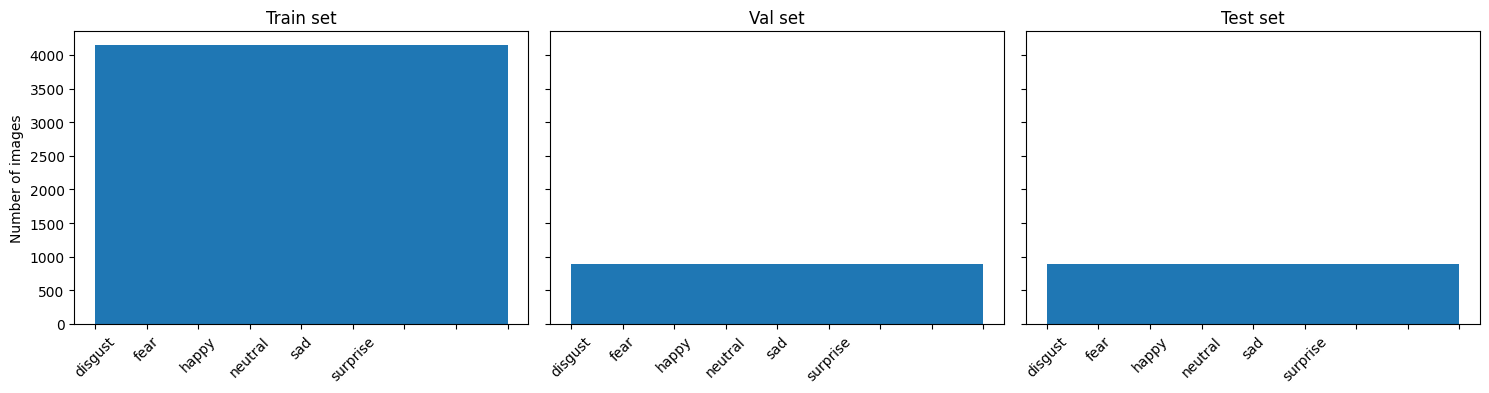

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, split in enumerate(split_files.keys()):
    axes[i].bar(emotions, df_split[split].values)
    axes[i].set_title(f"{split.capitalize()} set")
    axes[i].set_xticklabels(emotion_map.keys(), rotation=45)
    if i == 0:
        axes[i].set_ylabel("Number of images")

plt.tight_layout()

# Save the figure
plt.savefig("class_distribution_per_split.png", dpi=300, bbox_inches="tight")
plt.show()


## ✅ EDA Summary

- Dataset contains images of **7 emotion classes**.
- The **original dataset is imbalanced** – some emotions have many more images than others.
- We **balanced** the dataset by downsampling every emotion to the size of the smallest class.
- Images were organized into a clean structure:

  - `data/fer_dataset/processed_data/<emotion>/...`
  - `data/fer_dataset/train/<emotion>/...`
  - `data/fer_dataset/val/<emotion>/...`
  - `data/fer_dataset/test/<emotion>/...`

- Class distributions in **train / val / test** are now:

  - equal across emotions (balanced),
  - and follow the chosen split ratio (e.g. ~70/15/15).

